In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.express as px

pd.set_option('display.max_rows', 500)

#### Data cleaning for coffee consumption

In [78]:
# Clean Coffee_domestic_consumption.csv and Coffee_import_consumption.csv and combine them in one file Coffee_total_consumption.csv
# This step is already done, so no need to rerun.

# rename_countries = {
# "Dominican Republic":"Dominican Rep.",
# "Central African Republic":"Central African Rep.",
# "Democratic Republic of Congo":"Dem. Rep. Congo",
# "Equatorial Guinea":"Eq. Guinea",
# "Lao People's Democratic Republic":"Laos",
# "Trinidad & Tobago":"Trinidad and Tobago",
# "Viet Nam":"Vietnam",
# "Belgium/Luxembourg":"Luxembourg",
# "Russian Federation":"Russia",
# "Bolivia (Plurinational State of)":"Bolivia"
# }

# # Fix domestic consumption file
# domestic = pd.read_csv('../kaggle_coffee_dataset/Coffee_domestic_consumption.csv')
# domestic.drop(["Coffee type"], axis=1, inplace=True)
# domestic = domestic.rename(columns=lambda x: x.split("/")[0])
# domestic = domestic.rename(columns={"Total_domestic_consumption": "Total_consumption"})

# # Fix import consumption file
# import_consm = pd.read_csv('../kaggle_coffee_dataset/Coffee_importers_consumption.csv')
# import_consm = import_consm.rename(columns={"Total_import_consumption": "Total_consumption"})
# import_consm.Country = import_consm.Country.str.strip()

# # Combine domestic and import consumption
# total_consumption = pd.concat([domestic, import_consm])
# # Fix countries names
# total_consumption = total_consumption.replace(rename_countries)

# # Save to csv
# total_consumption.to_csv('../kaggle_coffee_dataset/Coffee_total_consumption.csv',index=False)


#### Data cleaning for coffee production

In [79]:
# Clean Coffee_production.csv and save it in a new csv file Coffee_prodcution_clean.csv.
# This step is already done, so no need to rerun.

# coffee_production = pd.read_csv('../kaggle_coffee_dataset/Coffee_production.csv')
# coffee_production['Coffee type'] = coffee_production['Coffee type'].replace(['Robusta/Arabica'], 'Arabica/Robusta')
# coffee_production = coffee_production.replace(rename_countries)
# coffee_production.to_csv('../kaggle_coffee_dataset/Coffee_production_clean.csv',index=False)

### Coffee production: Production Rates of top 10 Countries

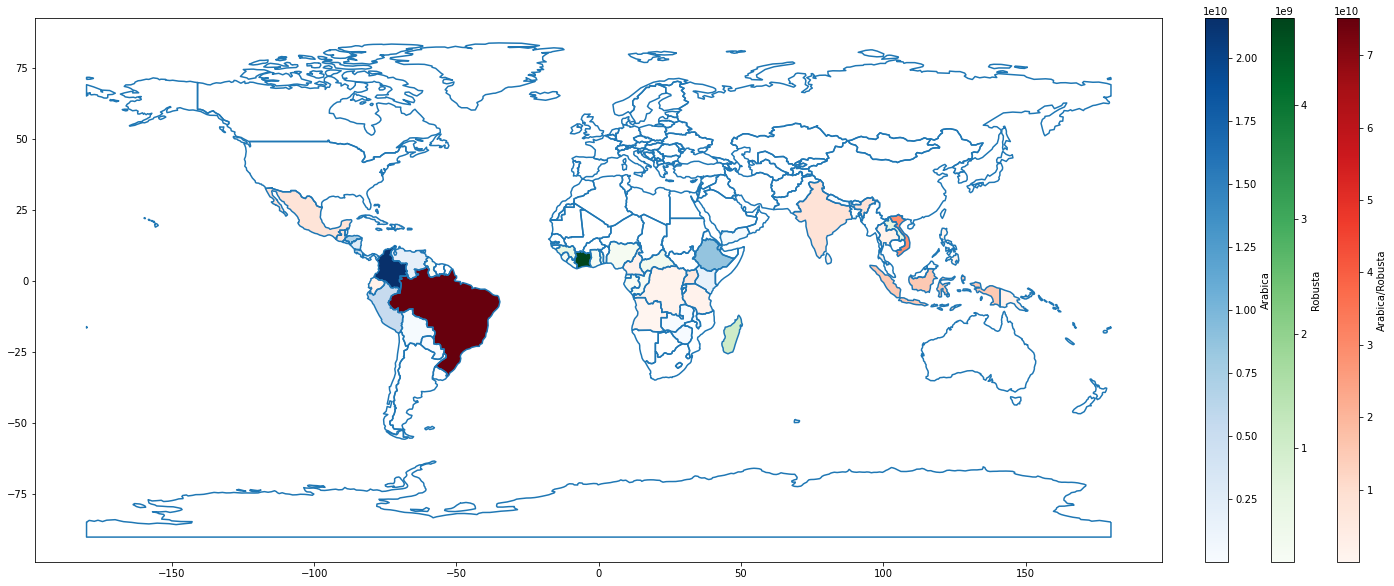

In [81]:
# Read the data from a CSV file
data = pd.read_csv('../kaggle_coffee_dataset/Coffee_production_clean.csv')

# Create a dictionary to map coffee types to colors
colors = {'Arabica': 'Blues', 'Robusta': 'Greens', 'Arabica/Robusta': 'Reds'}

# Create a GeoDataFrame with the country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the coffee data with the world data
merged = world.merge(data, how='left', left_on='name', right_on="Country")

ax = world["geometry"].boundary.plot(figsize=(30,10))
divider = make_axes_locatable(ax)

for coffee_type, color in colors.items():
    cax = divider.append_axes('right', size='2%', pad=0.6)
    cax.set_xlabel(coffee_type)
    merged[merged["Coffee type"] == coffee_type].plot(column='Total_production', cmap=color, legend=True, legend_kwds={"label": coffee_type}, ax=ax, cax=cax)


In [85]:
production = pd.read_csv('../kaggle_coffee_dataset/Coffee_production_clean.csv')

# select top 10 countries by total production
top_countries = production[['Country', 'Total_production']].sort_values(by='Total_production', ascending=False).head(10)['Country']

# select data for the top countries and transpose the dataframe
top_production = production[production.Country.isin(top_countries.unique())].T
top_production.drop(['Country', 'Total_production', 'Coffee type'], axis=0, inplace=True)
top_production.index.name = 'Year'
top_production.columns = top_countries.values

fig = px.line(top_production, x = top_production.index, y = top_production.columns,labels={
                     "Year": "Year",
                     "value": "Production Rate"}, title='Production Rates of top 10 Countries',width=1300, height=800)
fig.show()


## Coffee consumption

<AxesSubplot:>

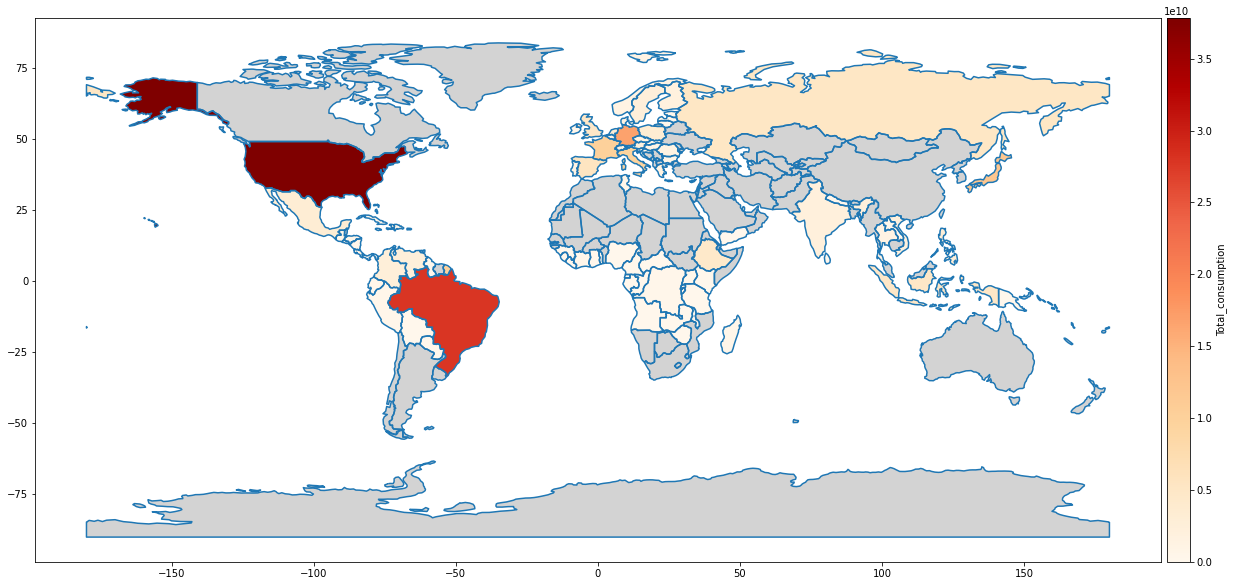

In [86]:
total_consumption = pd.read_csv('../kaggle_coffee_dataset/Coffee_total_consumption.csv')

# Create a GeoDataFrame with the country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the coffee data with the world data
merged = world.merge(total_consumption, how='left', left_on='name', right_on="Country")

# fig, ax = plt.subplots(figsize=(15, 5))
ax = world["geometry"].boundary.plot(figsize=(30,10))
divider = make_axes_locatable(ax)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad="0.5%")
merged.plot(column="Total_consumption", ax=ax, cax=cax, cmap='OrRd', legend=True, legend_kwds={"label": "Total_consumption"}, missing_kwds={'color': 'lightgrey'})